##  The Viterbi Heuristic
In the previous segment, you learnt how to calculate the probability of a tag sequence given a sequence of words. The idea is to compute the probability of all possible tag sequences and assign the sequence having the maximum probability.

 

Although this approach can work in principle, it is computationally very expensive. For e.g. if you have just three POS tags - DT, JJ, NN, and you want to tag the sentence "The high cost", there are 
3 (raised 3) = 27
 possible tag sequences (each word can have three possible tags).

 

In general, for a sequence of n  words and t tags, a total of t(raised)n tag sequences are possible. The Penn Treebank dataset in NLTK itself has 36 POS tags, so for a sentence of length say 10, there are 36(raised) 10
 possible tag sequences (that's about three thousand trillion!).

 

Clearly, computing trillions of probabilities to tag a 10-word sentence is impractical. Thus, we need to find a much more efficient approach to tagging.

String = "The high cost"
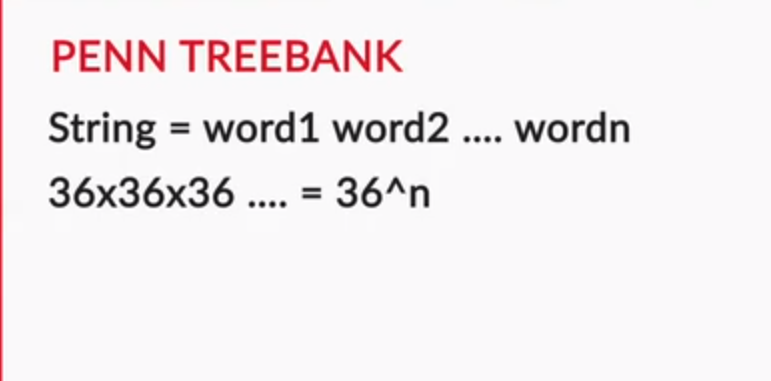

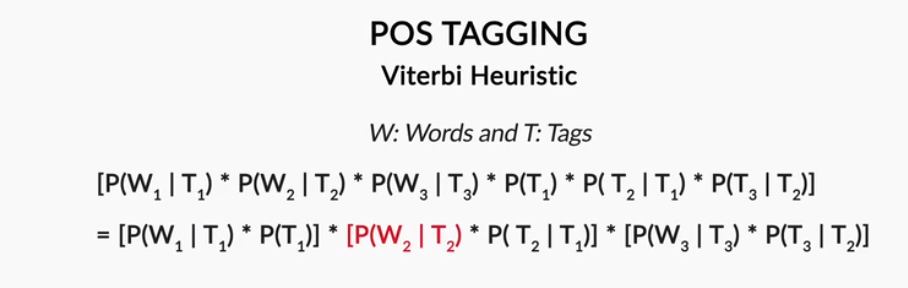

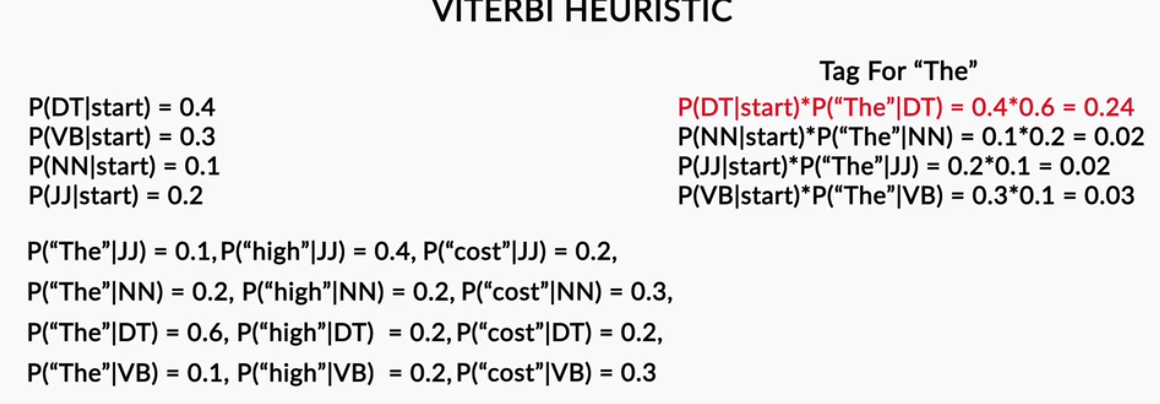

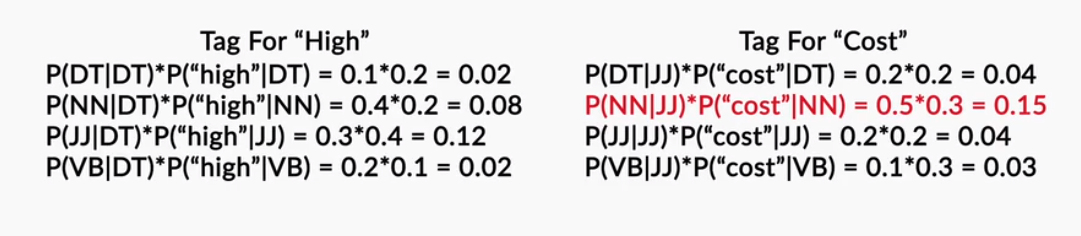



To summarise, the basic idea of the Viterbi algorithm is as follows - given a list of observations (words) O1,O2....On
 to be tagged, rather than computing the probabilities of all possible tag sequences, you assign tags sequentially, i.e. assign the most likely tag to each word using the previous tag. 

 

More formally, you assign the tag Tj  to each word Oi  such that it maximises the likelihood:

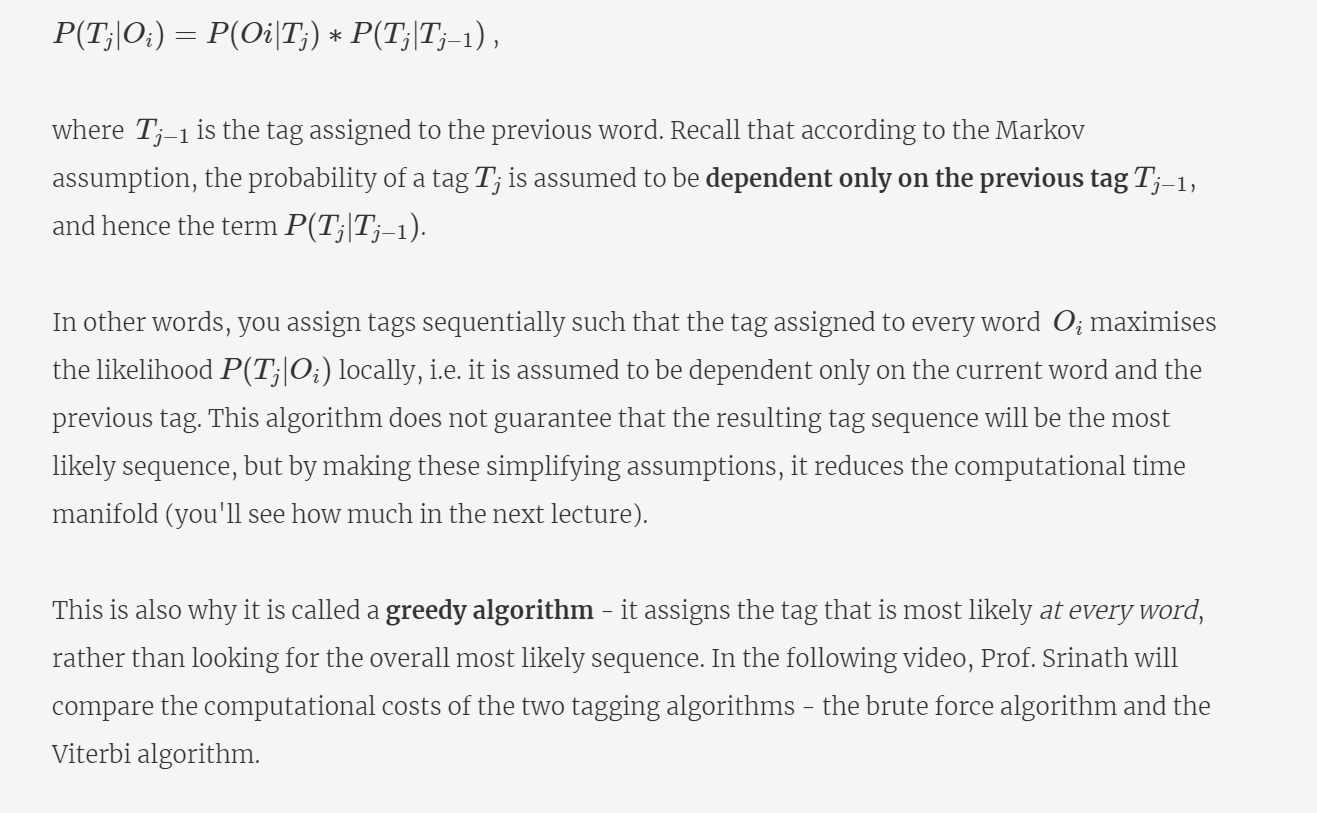

Veterbi is linear in its computational complexity which is O(nS) compared to Brute heuristic which comes to S raise to n

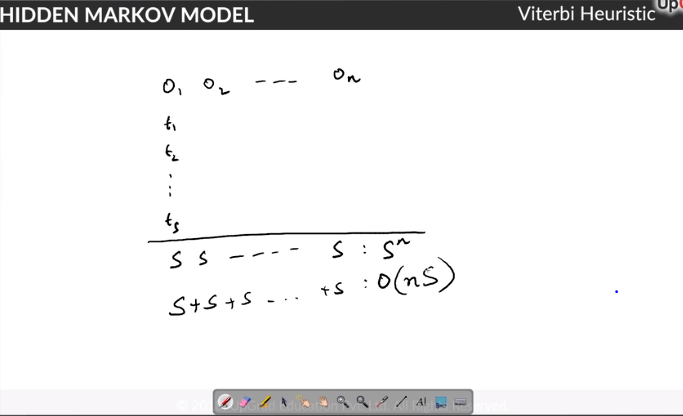

Now that you are familiar with the basic Viterbi algorithm, you will study Markov processes and Hidden Markov Models more formally in the next segment. In a later segment, you’ll also learn to write a POS tagging algorithm using the Viterbi heuristic.

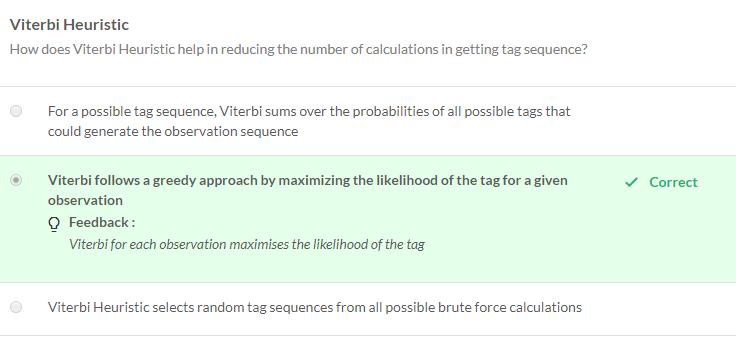
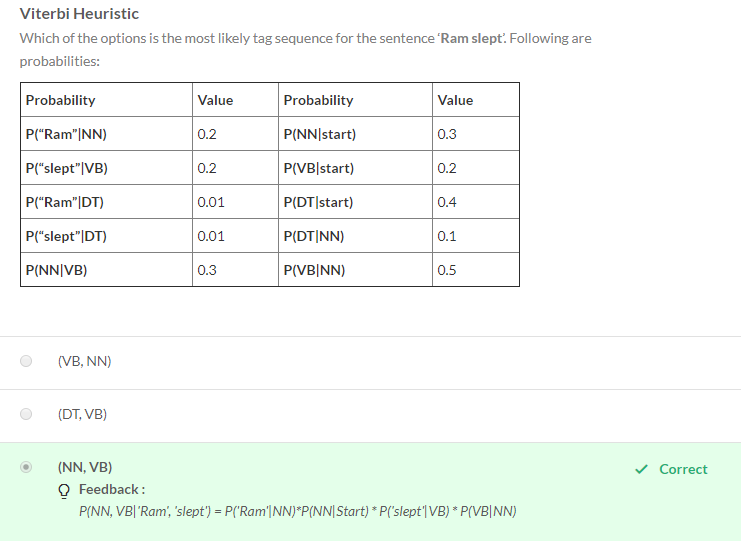

# Markov Chain and HMM
Markov models are probabilistic (or stochastic) models that were developed to model sequential processes. In a Markov process, it is usually assumed that the probability of each event (or state) depends only on the probability of the previous event. This simplifying assumption is a special case which is known as the Markovian, one-Markov and the first-order Markov assumption. 

 

The following lecture will introduce you to Markov processes more formally

A Markov chain is used to represent a process which performs a transition from one state to other. This transition makes an assumption that the probability of transitioning to the next state is dependent solely on the current state. Consider the figure below:

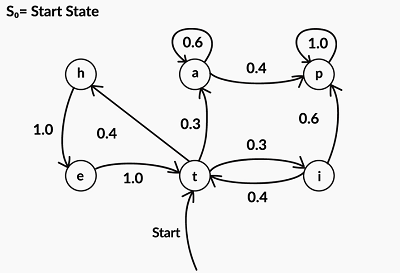

Here, ‘a’, ‘p’, ‘i’, ‘t’, ‘e’, ‘h’ are the states and the numbers mentioned on the edges are transition probabilities. For e.g. the probabilities of transitioning from the state ‘t’ to the states ‘i’, 'a' and 'h' are 0.3, 0.3, 0.4 respectively.

 

The start state is a special state which represents the initial state of the process (e.g. the start of a sentence).

 

Markov processes are commonly used to model sequential data, such as text and speech. For e.g., say you want to build an application which predicts the next word in a sentence. You can represent each word in a sentence as a state. The transition probabilities (which can be learnt from some corpus, more on that later) would represent the probability that the process moves from the current word to the next word. For e.g. the transition probability from the state 'San' to 'Franciso' will be higher than to the state 'Delhi'.

 

 

The Hidden Markov Model (HMM) is an extension to the Markov process which is used to model phenomena where the states are hidden (or latent) and they emit observations. For example, in a speech recognition system (a speech-to-text converter), the states represent the actual text words which you want to predict, but you do not directly observe them (i.e. the states are hidden). Rather, you only observe the speech (audio) signals corresponding to each word, and you need to infer the states using the observations.

 

Similarly, in POS tagging, what you observe are the words in a sentence, while the POS tags themselves are hidden. Thus, you can model the POS tagging task as an HMM with the hidden states representing POS tags which emit observations, i.e. words.

 

The hidden states emit observations with a certain probability. Therefore, along with the transition and initial state probabilities, Hidden Markov Models also have emission probabilities which represent the probability that an observation is emitted by a particular state.

 

The figure below illustrates the emission and transition probabilities for a hidden Markov process having three hidden states and four observations.

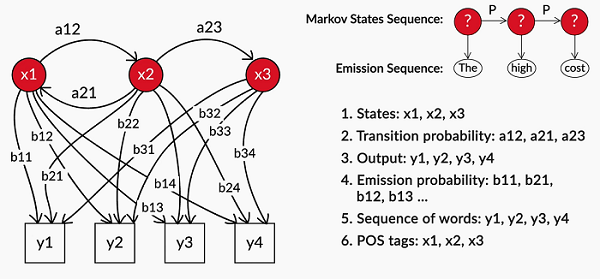

In the previous segment, you had used the transition and the emission probabilities for finding the most probable tag sequence for the sentence "The high cost". The probabilities P(NN|JJ), P(JJ|DT) etc. are transition probabilities, while the P(high|JJ), P(cost|NN) etc. are the emission probabilities.

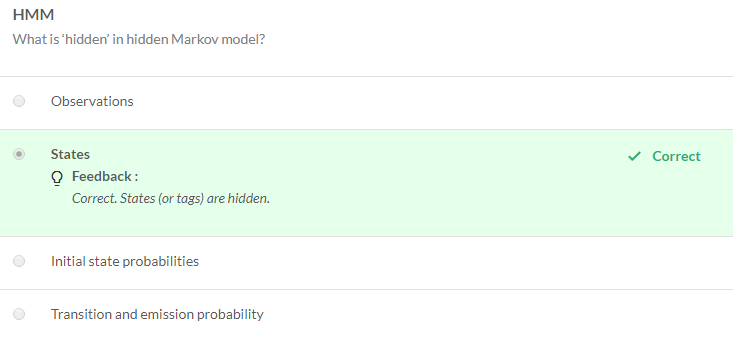



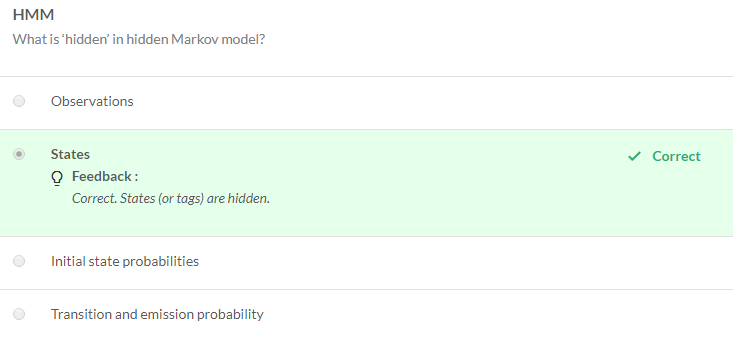

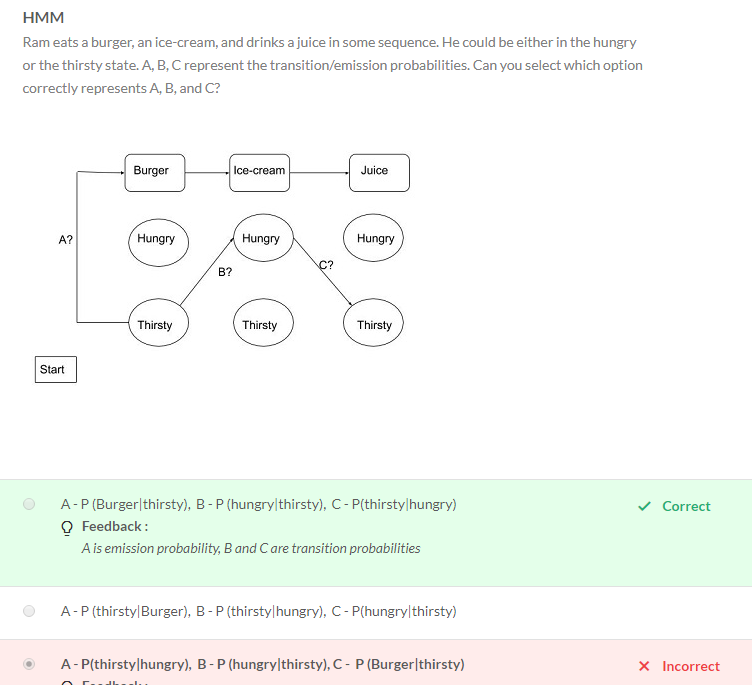

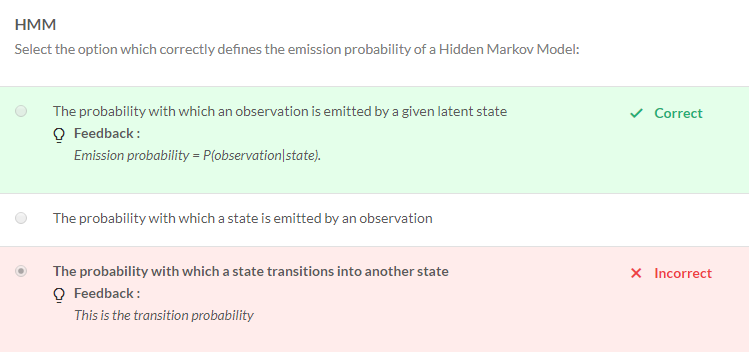

# Explanation Problem

In the previous segment, you learnt how the POS tagging problem can be modelled using an HMM. You saw that the sequence of words are the observations while the POS tags are the hidden states. Also, the HMM is represented by its initial state probabilities (i.e. the probability of transition into any state from the initial state), the transition and the emission probabilities.

 

These probabilities are usually learnt from a training corpus. For now, let's assume that you have already learnt these probabilities. Then, the explanation problem, also called the decoding problem, is as follows: Given a sequence of words/observations and an HMM model (i.e. transition, emission and start state probabilities), find the tag/state sequence which maximises the probability of observing the observed words. 

We are given a observed set of strings from O1, O2, O3 ... to OT and we want to identify the state sequence S1 .. ST in a new given U(mu) that best explains a given observation.

So we want to calcluate the probability of State sequence S given the observed Sequence O and a model U(mu). In other words we have to find that state sequence which maximises the observable probablity of the observed sequence.

Examples of State Sequence :DT/JJ/NN           DT/NN/JJ                JJ/DT/NN ...etc
    
Since the explanation problem is exponential in the number of tags, we need to find a more efficient algorithm to solve it. You already know that the Viterbi algorithm solves this problem. Next, Baba. Srinath will explain how to visualise the HMM as a trellis and solve the problem explanation problem using the Viterbi algorithm.

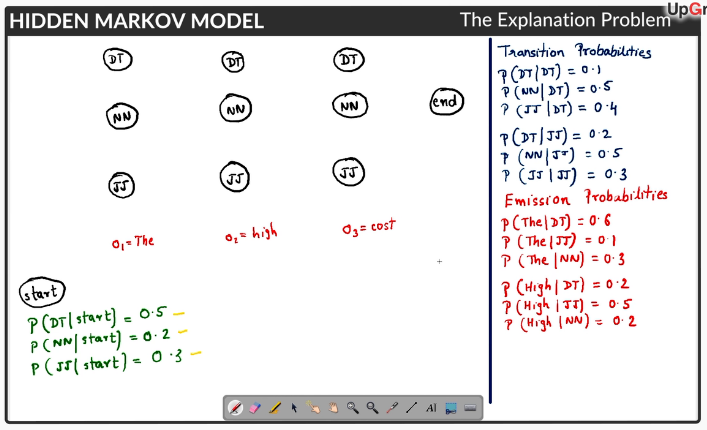

All the probabilities are calculated from the tagged corpus. Thus, we have used the same phrase for tagging 'The high cost' and have assumed that we have only three possible tags - DT, JJ, NN. We have also assumed some emission (P('the'|DT),  P( 'the '|NN), P('high'|JJ), etc.) and transition probabilities (P(NN|JJ), P(JJ|DT), P(DT|JJ), etc.). You'll learn how to calculate these probabilities from a tagged corpus in the next segment.

In the upcoming segment, Prof. Baba will demonstrate how to calculate the most probable tag sequence using the Viterbi Heuristic.Lets calculate the maximum probablity of "The" emitted at the start which will be

P(DT|start) *  Emission Probablity

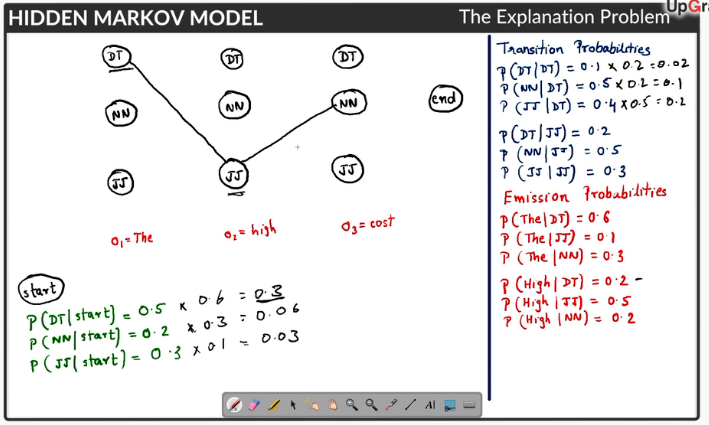

To summarise, given a Hidden Markov Model defined by the initial state, emission, and the transition probabilities, you assign a tag 
T
j
 to an observation 
O
i
 such that it maximises the likelihood:

 

P
(
T
j
|
O
i
)
=
P
(
O
i
|
T
j
)
∗
P
(
T
j
|
T
j
−
1
)

 

Note that the Viterbi algorithm, as demonstrated in the previous lecture, is an example of a dynamic programming algorithm. In general, algorithms which break down a complex problem into subproblems and solve each subproblem optimally are called dynamic programming algorithms. 

 

Until now, we had assumed some initial state, transition and emission probabilities and used them to compute the optimal tag sequence. But how do you actually learn these probabilities? This task is done using some tagged corpus, such as the Penn Treebank, and is called the learning problem.

 

In the next segments, you'll learn to solve the learning problem and write an algorithm Python to train your own HMM model using the Viterbi algorithm.

Explaination Problem 


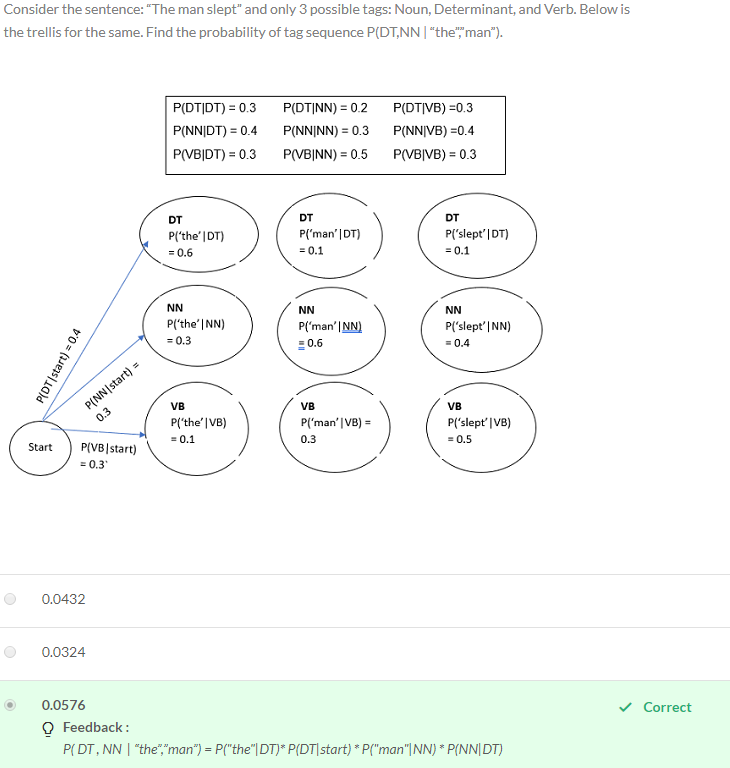

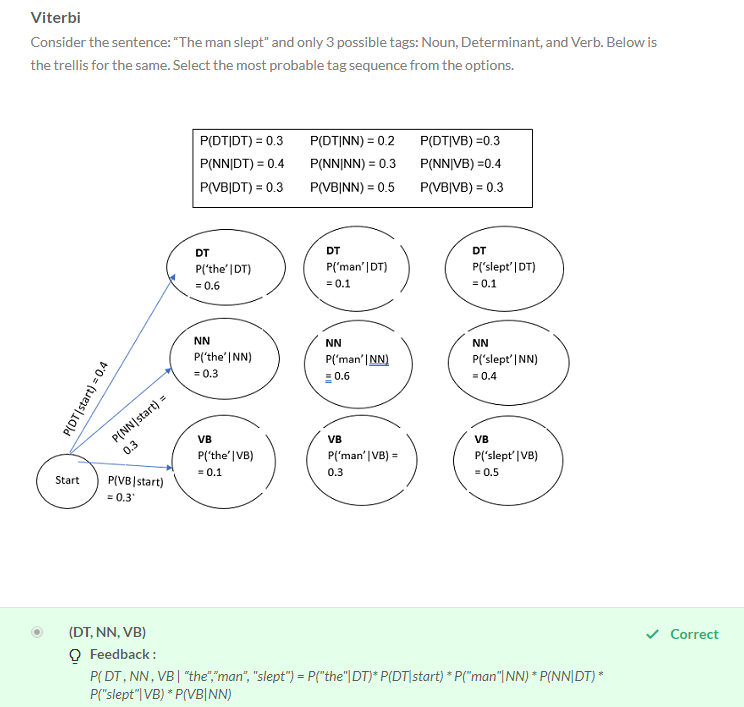

Additional References:

Likelihood problem of predicting the next possible word can be solved using forward algorithm. You can read about it in more detail from this link: https://web.stanford.edu/~jurafsky/slp3/9.pdf   (Refer to the section 9.3)

## Learning HMM Model Parameters
In this segment, you'll learn to compute the emission & transition probabilities from a tagged corpus. This process of learning the probabilities from a tagged corpus is called training an HMM model.

 

The following lecture will help you understand how that is done.

You studied how Viterbi Heuristic can deal with this problem by taking a greedy approach. The basic idea of the Viterbi algorithm is as follows - given a list of observations (words) O1,O2....On to be tagged, rather than computing the probabilities of all possible tag sequences, you assign tags sequentially, i.e. assign the most likely tag to each word using the previous tag.

More formally, you assign the tag Ti to each word Wi such that it maximises the likelihood:
P(Ti| Wi) = P(Wi|Ti) * P(Ti-1|Ti) ,
where Ti-1 is the tag assigned to the previous word. The probability of a tag Ti is assumed to be dependent only on the previous tag Ti-1, and hence the term P(Ti|Ti-1) - Markov Assumption.

Next you learnt that the Viterbi algorithm is an example of a dynamic programming algorithm. In general, algorithms which break down a complex problem into subproblems and solve each subproblem optimally are called dynamic programming algorithms.

#### Learning HMM Model Parameters

Next, you learnt to compute the emission & transition probabilities from a tagged corpus. This process of learning the probabilities from a tagged corpus is called training an HMM model. 

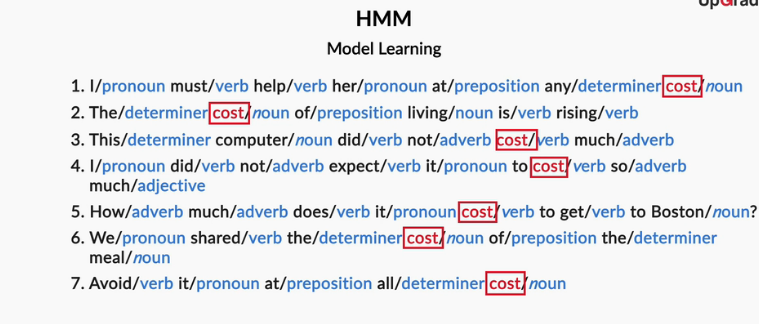




The emission and the transition probabilities can be learnt as follows:

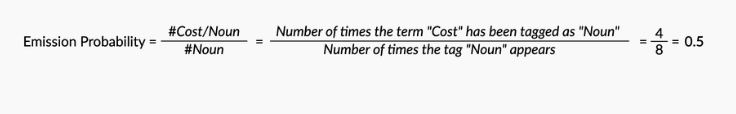

Emission Probability of a word 'w' for tag 't':

P(w|t) = Number of times w has been tagged t/Number of times t appears

Example: P(‘cat’|N) = Number of times ‘cat’ appears as Noun/ Number of times Noun is appearing



Transition Probability of tag t1 followed by tag t2:

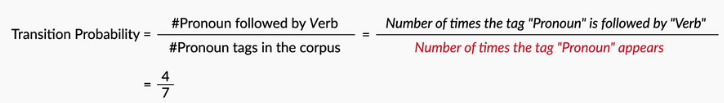

P(t2|t1) = Number of times t1 is followed by tag t2/ Number of times t1 appears

Example: P(Noun|Adj) = number of times adjective is followed by Noun/ Number of times Adjective is appearing

To summarise, the emission and the transition probabilities can be learnt as follows:

 

Emission Probability of a word 'w' for tag 't':

P(w|t) = Number of times w has been tagged t/Number of times t appears

 

Transition Probability of tag t1 followed by tag t2:

P(t2|t1) = Number of times t1 is followed by tag t2/ Number of times t1 appears

 

Now, let's practice some questions. Let’s assume you have the following POS tagged corpus. Now answer the questions in the quiz section. (Text is in form of word/tag)

 

[Twitter/NN  is/VB  the/DT  most/JJ  open/JJ  social/JJ  media/NN  platform/NN,  which/WDT is/VB  partly/RB  why/WRB  it/PRP  is/VB  used/VB  by/IN  so/RB  many/JJ  politicians/NN, celebrities/NN,  journalists/NN, technocrats/NN,  and/CC  experts/NN  working/VB  on/IN  pacy/JJ  topics/NN.  

As/IN  we/PRP  learned/VB  over/IN  the/DT  past/JJ  year/NN,  openness/NN  of/IN  Twitter/NN  was/VB  exploited/VB  by/IN  adversarial/JJ  governments/NN trying/VB  to/TO  influence/VB  elections/NN.

Twitter/NN  is/VB  marketing/VB  itself/PRP  as/IN  /DT  news/NN  platform/NN.]

 

The table below summarises the counts of the above text:

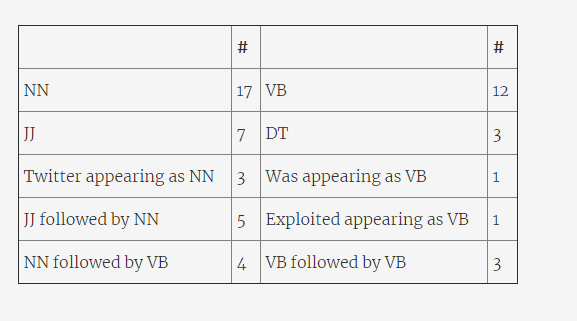

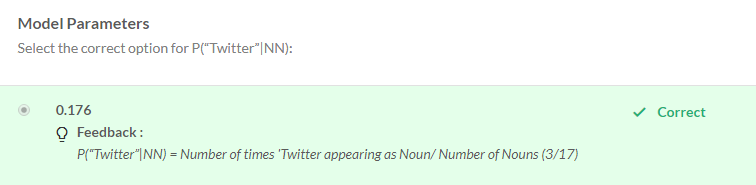

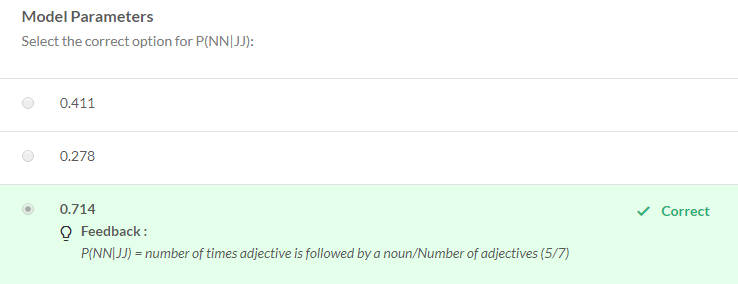

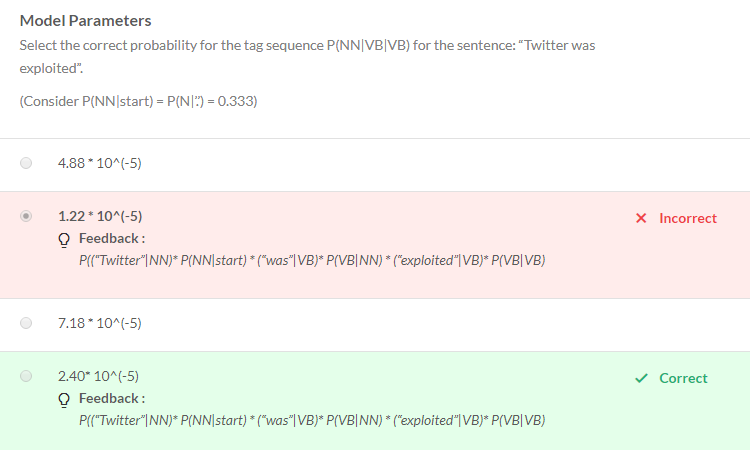

## HMM and the Viterbi Algorithm: Pseudocode
You have learnt the basic idea behind the two main problems in building an HMM for POS tagging  - the learning problem (learning the probabilities) and the explanation problem (solved using the Viterbi algorithm). In the next segment, you will learn to build an HMM using the Penn Treebank as the training corpus.

 

Before that, let's take a while to reiterate the important concepts and understand the pseudocode of this program.

 

The Penn Treebank is a manual of around a million words taken from 1989 Wall Street Journal's articles. This manual is available in NLTK toolkit of Python. You can explore this data by importing NLTK and then run the following code:

In [1]:
import nltk
wsj = list(nltk.corpus.treebank.tagged_sents())

The 'wsj' object is a list of list of tuples. Each tuple is in the form of (word, POS tag). You have already performed EDA on the Treebank data while building the lexicon and rule-based taggers.

 

In [3]:
#wsj

## Learning the HMM Model Parameters

Let's start with training the HMM to learn the probabilities. For this, you need to calculate the transition probability (from one state to another), the emission probability (of a state emitting a word), and the initial state probabilities (of a state appearing at the start of a sentence).

 

Transition Probability

Transition probability is the probability of moving from one state to another. You learnt how to calculate it in the last segment.  Let’s write the pseudocode to calculate the transition probabilities.

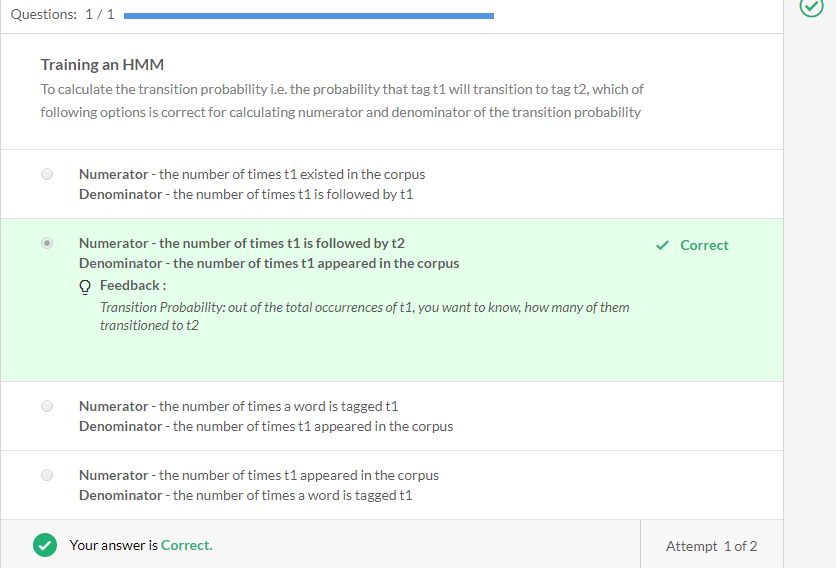

Thus, we compute the transition probabilities in a loop to get the probabilities for all possible POS tag pairs 
P
(
t
j
|
t
i
)
.

 

Emission Probability

Next, we calculate the emission probabilities, i.e. the probability that a tag 't' will ‘emit’ a word w.

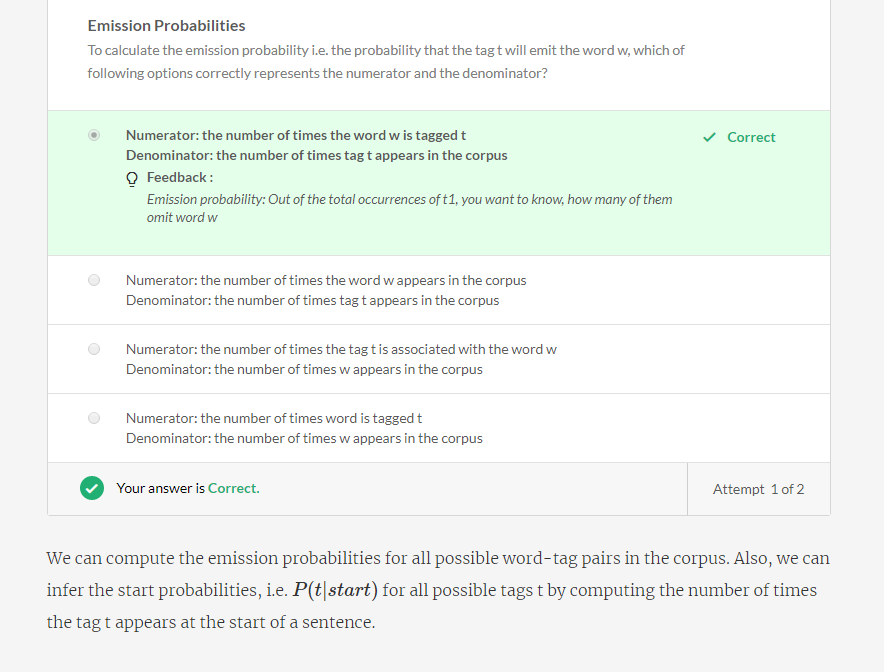

The Explanation/Decoding Problem: Viterbi Algorithm
After learning the model parameters, we need to find the best possible state (tag) sequence for each given sentence. We'll use the Viterbi algorithm - for every word w in the sentence, a tag t is assigned to w such that it maximises the likelihood of the occurrence of P(tag|word).

 

P(tag|word) = P(word|tag) * P(tag|previous tag)

                          = Emission probability * Transition probability

 

In other words, we assign the tag t to the word w which has the max P(tag|word).  

 

We'll keep on storing the assigned tags and words as a list of tuples. As we move to the next word in the list, each tag to be assigned will use the tag of the previous word. You may find the trellis quite useful to visualise the algorithm.

 

For the start word of a sentence, which is a 'boundary case', the sentence terminator of the previous tag can be used to calculate the initial state probabilities.

 

This forms the basis of developing a POS tagger using the Viterbi heuristic. In the next segment, we'll see how to implement this pseudocode in Python.

 

HMM & the Viterbi Algorithm: Python Implementation
You will now learn to build an HMM POS tagger using the Penn Treebank dataset as the training corpus.

 

In the following few exercises, you will learn to do the following in Python:

Conduct exploratory analysis on a tagged corpus
Sample the data into 70:30 train-test sets
Train an HMM model using the tagged corpus:
Calculating the emission probabilities 
P
(
w
i
|
t
j
)
  
Calculating the transition probabilities 
P
(
t
i
|
t
i
−
1
)
Write the Viterbi algorithm to POS tag sequence of words (sentence)
Evaluate the model predictions against the ground truth 
 

Prof. Baba will explain the Python implementation step-by-step. Please download the following Jupyter notebook. We recommend that you run the code along the video and experiment with it.

Check 1 c.POS+Tagging++-+HMM.pynb